Download NLTK dan modul untuk punctuation (punkt)</br>
Jalankan kode di bawah ini dan masukkan informasi yang ditandai dengan warna kuning seperti di gambar
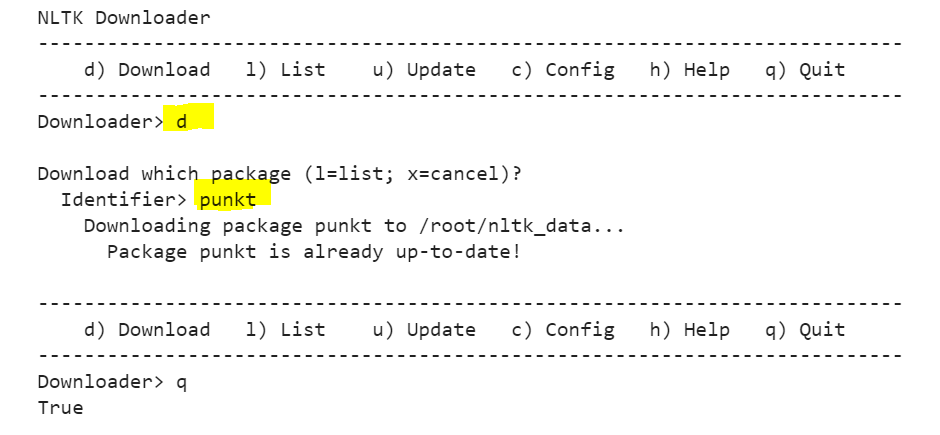

In [ ]:
import nltk
nltk.download()

In [ ]:
from nltk.util import ngrams
from nltk.probability import FreqDist
from google.colab import files

Upload file yang ingin diproses

In [ ]:
files.upload()
ls

In [ ]:
artikel = open("artikel1k.txt","r").read()
token = nltk.word_tokenize(artikel)

In [ ]:
bigram = ngrams(token,2)
bigram_fd = FreqDist(bigram)

In [ ]:
bigram_fd = FreqDist(bigram)

Simpan distribusi frekuensi dari unigram, bigram, dan trigram ke dalam file

In [ ]:
with open("bigram.txt","w") as f:
  for token in bigram_fd:
    f.write("{}\t{}\n".format(token,bigram_fd[token]))

In [ ]:
files.download("bigram.txt")

# Praktikum Menggunakan Pantun

pantun yang dikumpulkan dari tugas pekan lalu dapat didownload di Elena. silahkan buka file tersebut dengan python dan dihitung distribusi frekuensi unigram, bigram, dan trigramnya.

Sebelum dihitung frekuensinya, sebaiknya dilakukan preprosesing terlebih dahulu :


*   Hapus simbol simbol selain alfabet
*   Ubah semua huruf menjadi huruf kecil
*   Berikan padding di kiri dan kanan tiap baris



In [ ]:
import nltk
from nltk.util import ngrams
from nltk.probability import FreqDist, ConditionalFreqDist
from google.colab import files

nltk.download('punkt')

In [ ]:
files.upload()

In [ ]:
pantun = open("pantun.txt","r")

kalimat = []
for teks in iter(lambda: pantun.readline(),""):
  if(teks!="\n"):
    kalimat.append(teks)

In [ ]:
import re

for i,teks in enumerate(kalimat):
  kalimat[i] = re.sub(r"[^\w ]"," ", teks)

In [ ]:
listbigram = []

for k in kalimat:
  #bisa pakai fungsi split atau nltk.word_tokenize untuk membagi kalimat ke kata/token
  bigram = ngrams(k.lower().split(),2,pad_right=True,pad_left=True,left_pad_symbol="<s>",right_pad_symbol="</s>")
  for g in bigram:
    listbigram.append(g)

bigram_cfd = ConditionalFreqDist(listbigram)

In [ ]:
for i in bigram_cfd:
  print(i)

In [ ]:
bigram_cfd["buat"]

In [ ]:
listtrigram = []

for k in kalimat:
  #bisa pakai fungsi split atau nltk.word_tokenize untuk membagi kalimat ke kata/token
  trigram = ngrams(k.lower().split(),3,pad_right=True,pad_left=True,left_pad_symbol="<s>",right_pad_symbol="</s>")
  for g in trigram:
    listtrigram.append(g)

trigram_fd = FreqDist(listtrigram)

# Generating
Dari data bigram_cfd, kita bisa membuat kalimat secara random yang mengikuti gaya dari corpusnya.

In [ ]:
import random

def generate(batas):
  kalimat = []
  kata = "<s>"
  selesai = False
  while not selesai:
    r = random.random()
    acc=.0
    for key in bigram_cfd[kata]:
      acc += bigram_cfd[kata].freq(key)
      if(acc>=r):
        kata = key
        kalimat.append(kata)
        batas -= 1
        break
    if(kata=="</s>"):
      kalimat = kalimat[:-1]
      selesai = True
    if(batas <= 0):
      selesai = True
  return (' '.join(kalimat))

In [ ]:
generate(10)